In [4]:
# Parashikimi i cmimeve te shtepive ne Boston,SHBA duke perdorur Regression dhe korrelacionin midis variablave(kolonave)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Shkarkimi dhe leximi i dataset-it
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Leximi i dataset-it nga URL dhe emrat e kolonave
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Dictionary përkthimi i emrave të kolonave në gjuhën shqipe
column_translations = {
    "CRIM": "Krimi",
    "ZN": "Zona e Banuar",
    "INDUS": "Industria",
    "CHAS": "Kanalizimi",
    "NOX": "Nitrogjen",
    "RM": "Numri i dhomave",
    "AGE": "Mosha e ndërtimit",
    "DIS": "Distanca nga qendra",
    "RAD": "Rreziku i ndotjes",
    "TAX": "Taksa",
    "PTRATIO": "Raporti i studentëve dhe mësuesve",
    "B": "Përqindja e afro-amerikanëve",
    "LSTAT": "Përqindja e popullsisë me nivel të ulët të të ardhurave",
    "MEDV": "Vlera mesatare e shtëpive"
}

# Shfaqja e përkthimeve të kolonave
print("Përkthimi i Emrave të Kolonave në Gjuhën Shqipe:")
for key, value in column_translations.items():
    print(f"{key}: {value}")

# Statistika dhe informacion mbi dataset-in
print("\nInformacion rreth dataset-it:")
print(df.info())  # Informacion bazë mbi të dhënat
print("\nStatistika përmbledhëse:")
print(df.describe())  # Statistika përmbledhëse


<ipython-input-4-444ff230b333>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


Përkthimi i Emrave të Kolonave në Gjuhën Shqipe:
CRIM: Krimi
ZN: Zona e Banuar
INDUS: Industria
CHAS: Kanalizimi
NOX: Nitrogjen
RM: Numri i dhomave
AGE: Mosha e ndërtimit
DIS: Distanca nga qendra
RAD: Rreziku i ndotjes
TAX: Taksa
PTRATIO: Raporti i studentëve dhe mësuesve
B: Përqindja e afro-amerikanëve
LSTAT: Përqindja e popullsisë me nivel të ulët të të ardhurave
MEDV: Vlera mesatare e shtëpive

Informacion rreth dataset-it:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTR


Statistika përmbledhëse:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
s

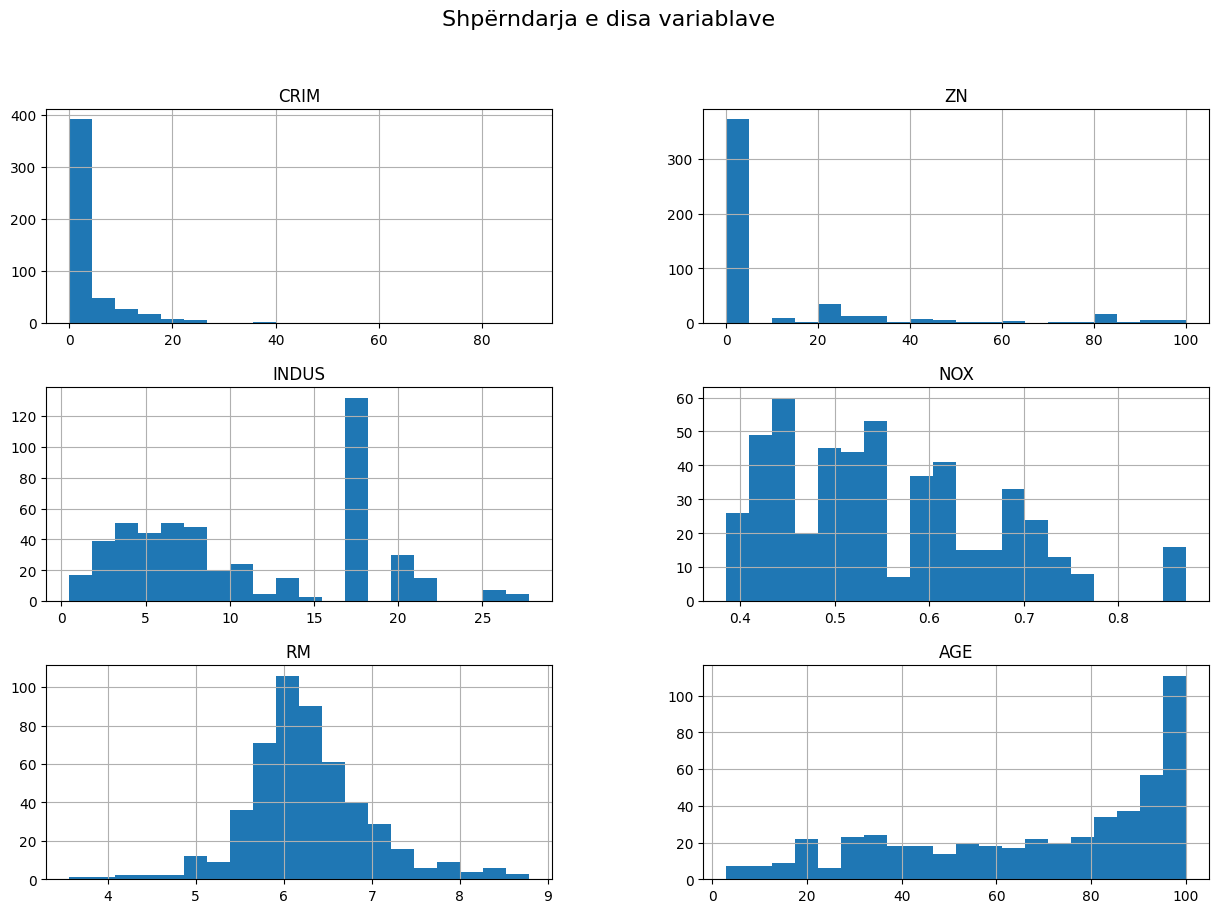

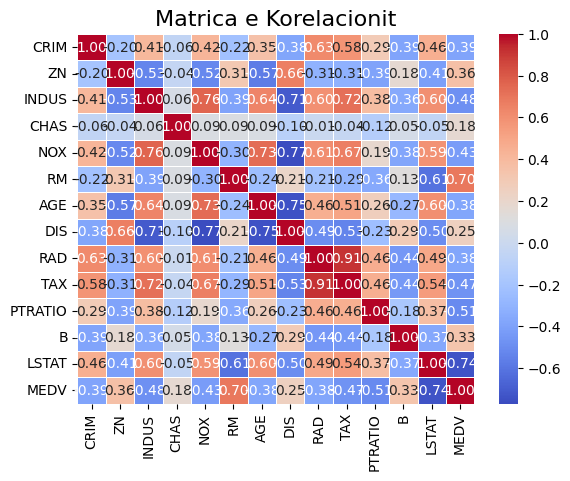

In [ ]:
# 2. Eksplorimi i të dhënave
print("\nStatistika përmbledhëse:")
print(df.describe())

# Vizualizimi i shpërndarjes së disa variablave
df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Shpërndarja e disa variablave", fontsize=16)
plt.show()

# Vizualizimi i korelacioneve mes variablave
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrica e Korelacionit", fontsize=16)
plt.show()


In [ ]:
# 3. Pastrimi i të dhënave (kontrollo për mungesa)
if df.isnull().sum().sum() == 0:
    print("\nNuk ka të dhëna të humbura.")
else:
    print("\nKa të dhëna të humbura. Ja shuma për kolonë:")
    print(df.isnull().sum())



Nuk ka të dhëna të humbura.



Numri i rreshtave pa outliers: 415


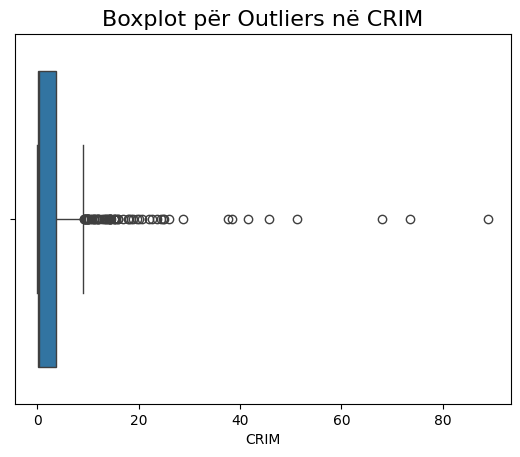

In [ ]:
# 4. Identifikimi dhe largimi i outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df))
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Heqja e outliers që kanë z-score më të madh se 3
print("\nNumri i rreshtave pa outliers:", df_no_outliers.shape[0])

# Vizualizimi i outliers për një variabël të caktuar, për shembull 'CRIM'
sns.boxplot(x=df['CRIM'])
plt.title("Boxplot për Outliers në CRIM", fontsize=16)
plt.show()



Korelacionet me MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


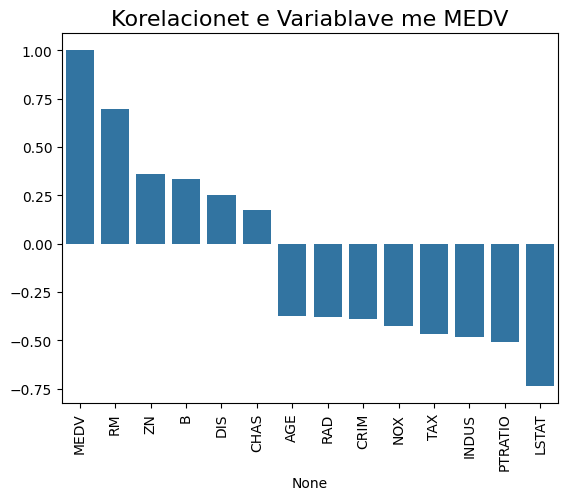

In [ ]:
# 5. Përzgjedhja e variablave relevante për modelin
correlation_matrix = df.corr()
print("\nKorelacionet me MEDV:")
print(correlation_matrix["MEDV"].sort_values(ascending=False))

# Vizualizimi i korelacioneve me MEDV
sns.barplot(x=correlation_matrix["MEDV"].sort_values(ascending=False).index,
            y=correlation_matrix["MEDV"].sort_values(ascending=False).values)
plt.title("Korelacionet e Variablave me MEDV", fontsize=16)
plt.xticks(rotation=90)
plt.show()


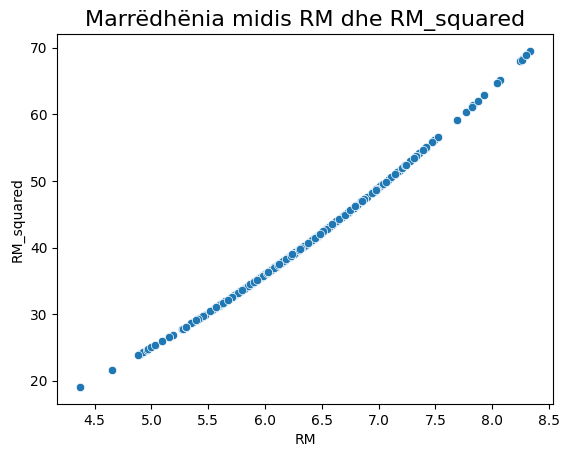

In [ ]:
# 6. Transformimi i variablave për marrëdhënie jo-lineare
df_transformed = df_relevant.copy()

# Krijimi i RM_squared dhe LSTAT_log
df_transformed["RM_squared"] = df_transformed["RM"] ** 2
df_transformed["LSTAT_log"] = np.log(df_transformed["LSTAT"] + 1)

# Vizualizimi i marrëdhënies midis RM dhe RM_squared
sns.scatterplot(x=df_transformed["RM"], y=df_transformed["RM_squared"])
plt.title("Marrëdhënia midis RM dhe RM_squared", fontsize=16)
plt.show()


In [ ]:
# 7. Standardizimi i të dhënave
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed.drop("MEDV", axis=1))  # Heqim MEDV nga variablat e pavarura
y_scaled = df_transformed["MEDV"].values  # Variabli i varur 'MEDV' ruhet në y_scaled


In [ ]:
# 8. Ndarja e të dhënave në train dhe test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)



Mean Squared Error (MSE): 7.75
R-squared (R2): 0.84


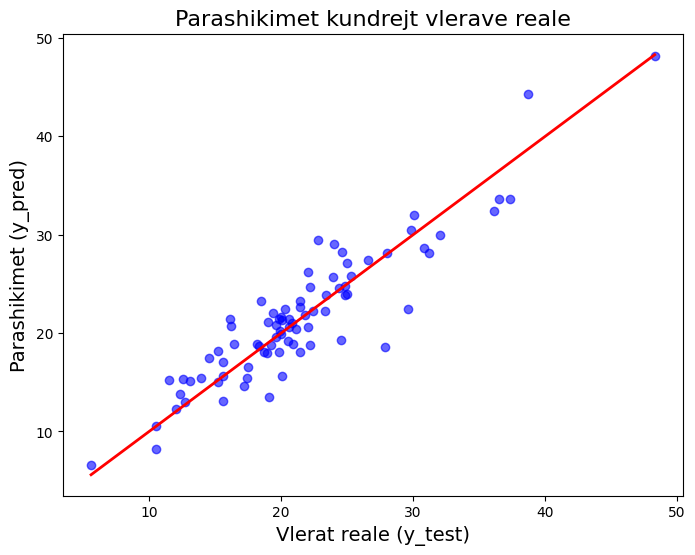

<ipython-input-39-446d6513661c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MSE', 'R2'], y=[mse, r2], ax=ax[1], palette='Blues')


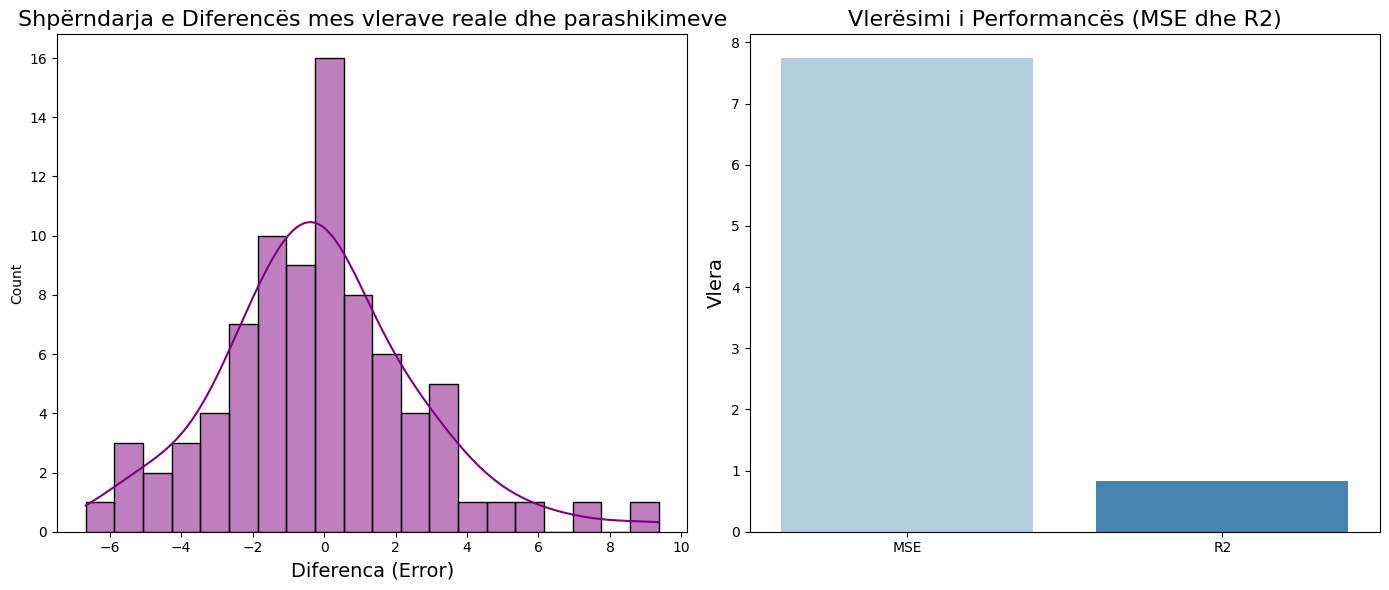

In [ ]:
# 9. Trajnimi i Modelit dhe Vlerësimi i Performancës
model = LinearRegression()
model.fit(X_train, y_train)

# Parashikimi me modelin
y_pred = model.predict(X_test)

# Vlerësimi i modelit
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Vizualizimi i parashikimeve kundrejt vlerave reale
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Parashikimet kundrejt vlerave reale", fontsize=16)
plt.xlabel("Vlerat reale (y_test)", fontsize=14)
plt.ylabel("Parashikimet (y_pred)", fontsize=14)
plt.show()

# Vizualizimi i shpërndarjes e MSE dhe R2
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Shpërndarja e parashikimeve dhe vlerave reale
sns.histplot(y_test - y_pred, kde=True, ax=ax[0], color='purple', bins=20)
ax[0].set_title("Shpërndarja e Diferencës mes vlerave reale dhe parashikimeve", fontsize=16)
ax[0].set_xlabel("Diferenca (Error)", fontsize=14)

# Vlerat e R-squared dhe MSE
sns.barplot(x=['MSE', 'R2'], y=[mse, r2], ax=ax[1], palette='Blues')
ax[1].set_title("Vlerësimi i Performancës (MSE dhe R2)", fontsize=16)
ax[1].set_ylabel("Vlera", fontsize=14)

plt.tight_layout()
plt.show()



Mean Absolute Error (MAE): 2.06
Mean Squared Error (MSE): 7.75
R-squared (R2): 0.84


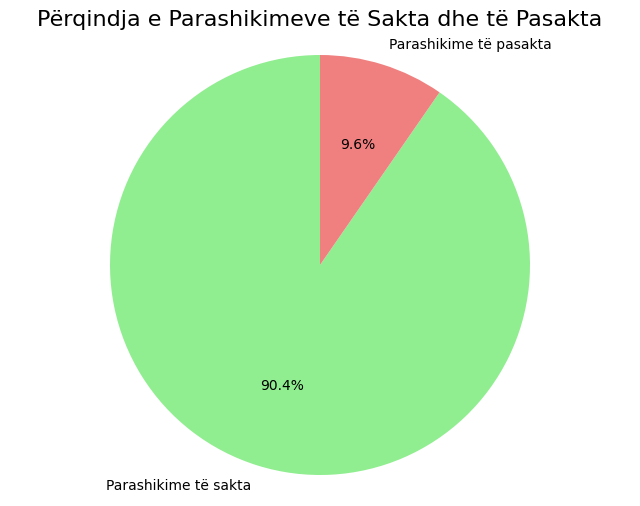

In [ ]:
# 10. Kthimi i Rezultateve të Trajnimit dhe Testimit
from sklearn.metrics import mean_absolute_error

# Llogaritja e gabimeve absolute
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Vizualizimi i përqindjes së parashikimeve të sakta dhe të pasakta
correct = np.sum(np.abs(y_test - y_pred) < 5)  # Parashikime të sakta në një interval të vogël
incorrect = np.sum(np.abs(y_test - y_pred) >= 5)  # Parashikime të pasakta

sizes = [correct, incorrect]
labels = ['Parashikime të sakta', 'Parashikime të pasakta']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title("Përqindja e Parashikimeve të Sakta dhe të Pasakta", fontsize=16)
plt.axis('equal')
plt.show()


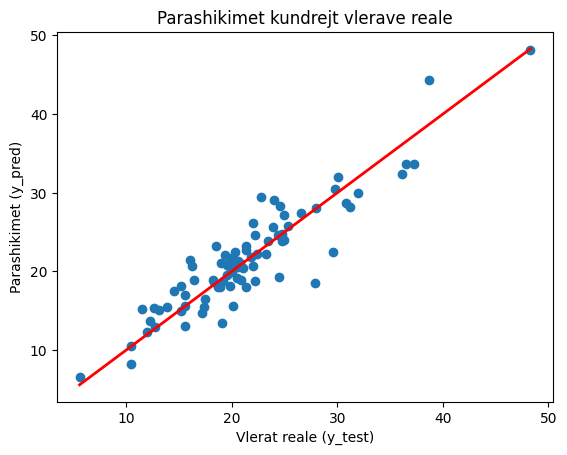

In [ ]:
# 11. Grafiku i parashikimeve kundrejt vlerave reale
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.title("Parashikimet kundrejt vlerave reale")
plt.xlabel("Vlerat reale (y_test)")
plt.ylabel("Parashikimet (y_pred)")
plt.show()


In [ ]:
# 12. Rezultatet e trajnimit dhe testit
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("\nRezultatet për Trajnimin:")
print(f"Mean Squared Error (MSE) për Trajnimin: {train_mse:.2f}")
print(f"R-squared (R2) për Trajnimin: {train_r2:.2f}")



Rezultatet për Trajnimin:
Mean Squared Error (MSE) për Trajnimin: 12.57
R-squared (R2) për Trajnimin: 0.82


In [ ]:
print("Test data results:")
print(f"Accuracy: {model.score(X_test, y_test)}")
print("-------------------------------------------------")

print("Train data results:")
print(f"Accuracy: {model.score(X_train, y_train)}")

Test data results:
Accuracy: 0.8367476230381532
-------------------------------------------------
Train data results:
Accuracy: 0.8183928782238696
